Enter your percentage : 90
Median: 0.5
Mean: 11.88125
Standard Deviation: 21.486673740658418


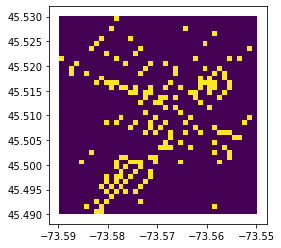

In [32]:
import geopandas
import pandas
import math
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from geopandas.tools import sjoin
import numpy as np
points = geopandas.GeoDataFrame.from_file('crime_dt.shp') 

xmin,ymin,xmax,ymax=points.geometry.total_bounds
x_step_size,y_step_size=0.001,0.001
x_array=np.arange(xmin,xmax,x_step_size)
y_array=np.arange(ymin,ymax,y_step_size)
indexes=[]
polygons=[]
loop=0
polyLeftCoords=[]
neededForGraph=[]

countVal=0
for yLoop in range(0,len(y_array)):
    y=y_array[yLoop]
    for xLoop in range(0,len(x_array)):
        x=x_array[xLoop]
        polygons.append(Polygon([(x,y),(x+x_step_size,y),(x+x_step_size,y+y_step_size),(x,y+y_step_size)]))
        countVal=countVal+1
        polyLeftCoords.append([x,y]);  
        indexes.append(loop)
        if xLoop==0  or   yLoop==0:
            neededForGraph.append(False);
        else:
            neededForGraph.append(True);
        loop=loop+1

indexDf=pandas.DataFrame({'a':indexes,'geometry':polygons})
polyDF=geopandas.GeoDataFrame(indexDf)
polyDF.crs = points.crs
pointInPolys = sjoin(polyDF, points, how='left').groupby(['a']).agg(['count'])['index_right'].merge(polyDF,on='a')
sortedCountList=[]
countList=[]


for i in pointInPolys['count']:
    sortedCountList.append(i)
    countList.append(i)

sortedCountList.sort()
percentage = input("Enter your percentage : ") 
percentIndex=int(len(polygons)*int(percentage)/100)
threshold=sortedCountList[percentIndex]
print("Median:",np.median(sortedCountList));
print("Mean:",np.mean(sortedCountList))
print("Standard Deviation:",np.std(sortedCountList))
colors=[]
for i in countList:
    if i<threshold  or i==0:
        colors.append('Blue')
    else:
        colors.append('Yellow')
coloredDF=pandas.DataFrame({'colors':colors,'geometry':polygons, 'count':countList})
coloredGeoDF=geopandas.GeoDataFrame(coloredDF)
coloredGeoDF.plot(column='colors',cmap='viridis')



################ Graph Representation
x_array_len=len(x_array)
y_array_len=len(y_array)
startNode=x_array_len-1
polygons_len=len(polygons)
neighbours=[]

for polygonLoop in range(0,polygons_len):
    if neededForGraph[polygonLoop]==True:
        polygonNeigh=[]
        neighbour=polygonLoop+1
        if  not ((neighbour%x_array_len==0)   or  neighbour<0  or  neighbour>=polygons_len  or  neededForGraph[neighbour]==False):
            downPolygon=polygonLoop-x_array_len
            if  downPolygon>=0  and   downPolygon<polygons_len  and  ( colors[polygonLoop]=='Blue'   or  colors[downPolygon]=='Blue'):
                cost=1
                if  colors[polygonLoop]=='Yellow'   or  colors[downPolygon]=='Yellow':
                    cost=1.3
                polygonNeigh.append({'neighbour':neighbour,'cost':cost})
        neighbour=polygonLoop-1
        if  not (neighbour<0  or  neighbour>=polygons_len  or  neededForGraph[neighbour]==False):
            downPolygon=polygonLoop-x_array_len-1
            if  downPolygon>=0  and   downPolygon<polygons_len  and  ( colors[polygonLoop-1]=='Blue'   or  colors[downPolygon]=='Blue'):
                cost=1
                if  colors[polygonLoop-1]=='Yellow'   or  colors[downPolygon]=='Yellow':
                    cost=1.3
                polygonNeigh.append({'neighbour':neighbour,'cost':cost})
        neighbour=polygonLoop-x_array_len
        if  not (neighbour<0  or  neighbour>=polygons_len  or  neededForGraph[neighbour]==False):
            downPolygonLeft=polygonLoop-x_array_len-1
            downPolygonRight=polygonLoop-x_array_len
            if  downPolygonLeft>=0  and   downPolygonLeft<polygons_len  and   downPolygonRight>=0  and   downPolygonRight<polygons_len   and  ( colors[downPolygonLeft]=='Blue'   or  colors[downPolygonRight]=='Blue'):
                cost=1
                if  colors[downPolygonLeft]=='Yellow'   or  colors[downPolygonRight]=='Yellow':
                    cost=1.3
                polygonNeigh.append({'neighbour':neighbour,'cost':cost})
        neighbour=polygonLoop-x_array_len-1
        if  not (neighbour<0  or  neighbour>=polygons_len  or  neededForGraph[neighbour]==False):
            leftDownCrossPoly=polygonLoop-x_array_len-1
            if  leftDownCrossPoly>=0  and   leftDownCrossPoly<polygons_len  and  colors[leftDownCrossPoly]=='Blue':
                cost=1.5
                polygonNeigh.append({'neighbour':neighbour,'cost':cost})
        neighbour=polygonLoop-x_array_len+1
        if  not (neighbour<0  or  neighbour>=polygons_len  or  neededForGraph[neighbour]==False):
            downPoly=polygonLoop-x_array_len
            if  downPoly>=0  and   downPoly<polygons_len  and  colors[downPoly]=='Blue':
                cost=1.5
                polygonNeigh.append({'neighbour':neighbour,'cost':cost})
        neighbour=polygonLoop+x_array_len
        if  not (neighbour<0  or  neighbour>=polygons_len  or  neededForGraph[neighbour]==False):
            upPolygonLeft=polygonLoop-1
            upPolygonRight=polygonLoop
            if  upPolygonLeft>=0  and   upPolygonLeft<polygons_len  and   upPolygonRight>=0  and   upPolygonRight<polygons_len   and  ( colors[upPolygonLeft]=='Blue'   or  colors[upPolygonRight]=='Blue'):
                cost=1
                if  colors[upPolygonLeft]=='Yellow'   or  colors[upPolygonRight]=='Yellow':
                    cost=1.3
                polygonNeigh.append({'neighbour':neighbour,'cost':cost})
        neighbour=polygonLoop+x_array_len-1
        if  not (neighbour<0  or  neighbour>=polygons_len or  neededForGraph[neighbour]==False):
            leftPoly=polygonLoop-1
            if  leftPoly>=0  and   leftPoly<polygons_len  and  colors[leftPoly]=='Blue':
                cost=1.5
                polygonNeigh.append({'neighbour':neighbour,'cost':cost})
        neighbour=polygonLoop+x_array_len+1
        if  not (neighbour<0  or  neighbour>=polygons_len or  neededForGraph[neighbour]==False):
            if  colors[polygonLoop]=='Blue':
                cost=1.5
                polygonNeigh.append({'neighbour':neighbour,'cost':cost})
        neighbours.append(polygonNeigh)
    else:
        neighbours.append([])
        

Cost: 62.099999999999994
Time: 0.013962507247924805 seconds


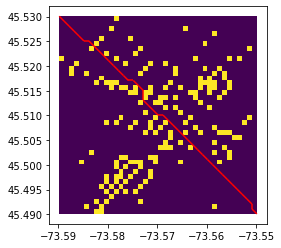

In [33]:
######################A* algorithm
import time
import sys
import heapq
from shapely.geometry import Point, LineString

timeAStart=time.time()
startPolygonID=x_array_len-1
startPointCoor=np.dstack(polygons[startPolygonID].boundary.coords.xy).tolist()[0][1]
targetPolygonID=(x_array_len)*(y_array_len-1)
targetPointCoor=np.dstack(polygons[targetPolygonID].boundary.coords.xy).tolist()[0][3]

if colors[startPolygonID]=='Yellow'  or  colors[targetPolygonID]=='Yellow':
    print('Due to blocks, no path is found. Please change the map and try again')
else:
    openList=[]
    closedList=[False]*polygons_len
    parents=[-1]*polygons_len
    fValue=[-1]*polygons_len
    distance=[sys.maxsize]*polygons_len
    heapq.heapify(openList)
    source=(2*x_array_len)-1
    goal=((y_array_len-1)*(x_array_len))+1
    absValNode=abs(polyLeftCoords[source][0]-polyLeftCoords[goal][0])
    absValGoal=abs(polyLeftCoords[source][1]-polyLeftCoords[goal][1])
    hValue=absValNode if absValNode>absValGoal else absValGoal
    distance[source]=1.5
    fValue[source]=hValue+distance[source]
    heapq.heappush(openList,(fValue[source],source))
    while openList!=[]:
        (nodeFValue,node)=heapq.heappop(openList)
        if nodeFValue==fValue[node]:
            closedList[node]=True
            if node==goal:
                break
            for neighbour in neighbours[node]:
                neighbourID=neighbour['neighbour']
                neighbourCost=neighbour['cost']
                if distance[neighbourID]>distance[node]+neighbourCost    and   closedList[neighbourID]==False:
                    distance[neighbourID]=distance[node]+neighbourCost
                    absValX=abs(polyLeftCoords[neighbourID][0]-polyLeftCoords[goal][0])
                    absValY=abs(polyLeftCoords[neighbourID][1]-polyLeftCoords[goal][1])
                    hValue=absValX if absValX>absValY else absValY
                    fValue[neighbourID]=distance[neighbourID]+hValue
                    parents[neighbourID]=node
                    heapq.heappush(openList,(fValue[neighbourID],neighbourID))

    node=goal
    lines=[[Point(targetPointCoor[0], targetPointCoor[1]),Point(polyLeftCoords[goal][0], polyLeftCoords[goal][1])]]
    found=True
    while node!=source:
        if parents[node]==-1:
            print('Due to blocks, no path is found. Please change the map and try again')
            found=False
            break
        else:
            point1 = Point(polyLeftCoords[node][0], polyLeftCoords[node][1])
            node=parents[node]
            point2 = Point(polyLeftCoords[node][0], polyLeftCoords[node][1])
            lines.append([point1,point2])
    
    if found== True:
        print('Cost:',distance[goal]+1.5)
        lines.append([Point(startPointCoor[0], startPointCoor[1]),Point(polyLeftCoords[source][0], polyLeftCoords[source][1])])        
        linesDF = geopandas.GeoDataFrame(lines,columns=['geometry_1', 'geometry_2'])
        linesDF['line'] = linesDF.apply(lambda x: LineString([x['geometry_1'], x['geometry_2']]), axis=1)
        linesGeoDF = geopandas.GeoDataFrame(linesDF, geometry=linesDF['line'])
        print('Time:',time.time()-timeAStart,'seconds')
        figure_sub, ax = plt.subplots()
        coloredGeoDF.plot(ax=ax,column = 'colors', cmap = 'viridis')
        linesGeoDF.plot(ax=ax, color='red')
        plt.show()

Time: 0.010994672775268555 seconds
Cost: 65.19999999999999


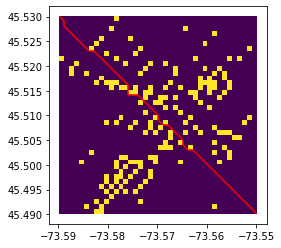

In [34]:
###############best first search new

import sys
import heapq
from shapely.geometry import Point, LineString

timeBFSStart=time.time()
startPolygonID=x_array_len-1
startPointCoor=np.dstack(polygons[startPolygonID].boundary.coords.xy).tolist()[0][1]
targetPolygonID=(x_array_len)*(y_array_len-1)
targetPointCoor=np.dstack(polygons[targetPolygonID].boundary.coords.xy).tolist()[0][3]

if colors[startPolygonID]=='Yellow'  or  colors[targetPolygonID]=='Yellow':
    print('Due to blocks, no path is found. Please change the map and try again')
else:
    openList=[]
    openListPresent=[False]*polygons_len
    closedList=[False]*polygons_len
    parents=[-1]*polygons_len
    hValue=[sys.maxsize]*polygons_len
    distance=[sys.maxsize]*polygons_len
    source=(2*x_array_len)-1
    goal=((y_array_len-1)*(x_array_len))+1
    absValNode=abs(polyLeftCoords[source][0]-polyLeftCoords[goal][0])
    absValGoal=abs(polyLeftCoords[source][1]-polyLeftCoords[goal][1])
    hValue[source]=absValNode if absValNode>absValGoal else absValGoal
    openList.append((hValue[source],source))
    openListPresent[source]=True
    distance[source]=1.5
    while openList!=[]:
        nodeHValue=sys.maxsize
        minIndex=-1
        for valLoop in range(0,len(openList)):
            if openList[valLoop][0]<nodeHValue:
                nodeHValue=openList[valLoop][0]
                minIndex=valLoop
        (nodeHValue,node)=openList.pop(minIndex)
        closedList[node]=True
        if node==goal:
            break
        for neighbour in neighbours[node]:
            neighbourID=neighbour['neighbour']
            neighbourCost=neighbour['cost']
            if closedList[neighbourID]==False  and   openListPresent[neighbourID]==False:
                absValNeigh=abs(polyLeftCoords[neighbourID][0]-polyLeftCoords[goal][0])
                absValGoal=abs(polyLeftCoords[neighbourID][1]-polyLeftCoords[goal][1])
                hValue[neighbourID]=absValNeigh if absValNeigh>absValGoal else absValGoal
                parents[neighbourID]=node
                distance[neighbourID]=distance[node]+neighbourCost
                openListPresent[neighbourID]=True
                openList.append((hValue[neighbourID],neighbourID))
        
    node=goal
    linesBFS=[[Point(targetPointCoor[0], targetPointCoor[1]),Point(polyLeftCoords[goal][0], polyLeftCoords[goal][1])]]
    found=True
    while node!=source:
        if parents[node]==-1:
            print('Due to blocks, no path is found. Please change the map and try again')
            found=False
            break
        else:
            point1 = Point(polyLeftCoords[node][0], polyLeftCoords[node][1])
            node=parents[node]
            point2 = Point(polyLeftCoords[node][0], polyLeftCoords[node][1])
            linesBFS.append([point1,point2])
    
    if found==True:
        linesBFS.append([Point(startPointCoor[0], startPointCoor[1]),Point(polyLeftCoords[source][0], polyLeftCoords[source][1])])        
        linesBFSDF = geopandas.GeoDataFrame(linesBFS,columns=['geometry_1', 'geometry_2'])
        linesBFSDF['line'] = linesBFSDF.apply(lambda x: LineString([x['geometry_1'], x['geometry_2']]), axis=1)
        linesGeoBFSDF = geopandas.GeoDataFrame(linesBFSDF, geometry=linesBFSDF['line'])
        print('Time:',time.time()-timeBFSStart,'seconds')
        print('Cost:',distance[goal]+1.5)
        figure, x = plt.subplots()
        coloredGeoDF.plot(ax=x,column = 'colors', cmap = 'viridis')
        linesGeoBFSDF.plot(ax=x, color='red')
        plt.show()

In [35]:
import os
(os.getcwd())

'C:\\Users\\Dhwani\\Desktop\\AI project\\Code\\JupyterNotebook'